In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Flatten, Reshape

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [14]:
df = pd.read_csv('weather_prediction_dataset_m.csv')
df_bbq = pd.read_csv('weather_prediction_bbq_labels.csv')

In [15]:
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


In [16]:
df_bbq.head()

,DATE,BASEL_BBQ_weather,BUDAPEST_BBQ_weather,DE_BBQ_weather,DRESDEN_BBQ_weather,DUSSELDORF_BBQ_weather,HEATHROW_BBQ_weather,KASSEL_BBQ_weather,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20000102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20000103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20000104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,20000105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
df.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)

In [18]:
len(df_bbq.columns), df_bbq.columns

(18,
 Index(['DATE', 'BASEL_BBQ_weather', 'BUDAPEST_BBQ_weather', 'DE_BBQ_weather',
        'DRESDEN_BBQ_weather', 'DUSSELDORF_BBQ_weather', 'HEATHROW_BBQ_weather',
        'KASSEL_BBQ_weather', 'LJUBLJANA_BBQ_weather', 'MAASTRICHT_BBQ_weather',
        'MALMO_BBQ_weather', 'MONTELIMAR_BBQ_weather', 'MUENCHEN_BBQ_weather',
        'OSLO_BBQ_weather', 'PERPIGNAN_BBQ_weather', 'SONNBLICK_BBQ_weather',
        'STOCKHOLM_BBQ_weather', 'TOURS_BBQ_weather'],
       dtype='object'))

In [19]:
df_bbq.columns[30:41]

Index([], dtype='object')

In [20]:
required_columns = ['DATE', 'DRESDEN_cloud_cover', 'DRESDEN_wind_speed', 'DRESDEN_wind_gust',
       'DRESDEN_humidity', 'DRESDEN_global_radiation', 'DRESDEN_precipitation',
       'DRESDEN_sunshine', 'DRESDEN_temp_mean', 'DRESDEN_temp_min',
       'DRESDEN_temp_max']

missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Columns missing from DataFrame: {missing_columns}")
else:
    df_Dresden = df[required_columns]

In [21]:
df_Dresden['BBQ'] = df_bbq['DRESDEN_BBQ_weather'];

C:\Users\Raj\AppData\Local\Temp\ipykernel_30412\2405519419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Dresden['BBQ'] = df_bbq['DRESDEN_BBQ_weather'];


In [22]:
df_Dresden

,DATE,DRESDEN_cloud_cover,DRESDEN_wind_speed,DRESDEN_wind_gust,DRESDEN_humidity,DRESDEN_global_radiation,DRESDEN_precipitation,DRESDEN_sunshine,DRESDEN_temp_mean,DRESDEN_temp_min,DRESDEN_temp_max,BBQ
0,20000101,8,3.2,7.2,0.89,0.09,0.32,0.0,1.0,-1.8,2.0,False
1,20000102,7,4.0,8.8,0.89,0.23,0.00,0.4,2.5,1.4,4.0,False
2,20000103,7,5.4,12.1,0.79,0.18,0.00,0.0,4.2,1.3,5.1,False
3,20000104,8,6.0,14.4,0.88,0.11,0.22,0.0,4.4,3.4,5.2,False
4,20000105,2,5.6,15.8,0.76,0.49,0.00,5.7,1.8,-0.5,6.9,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,6,5.4,13.0,0.83,0.21,0.00,0.0,2.1,0.0,3.9,False
3650,20091229,6,4.0,13.0,0.80,0.44,0.31,6.2,0.2,-2.7,2.6,False
3651,20091230,8,2.6,9.4,0.95,0.12,0.89,0.0,1.6,0.2,3.7,False
3652,20091231,8,2.6,5.8,0.97,0.07,0.24,0.0,-0.2,-1.0,1.9,False


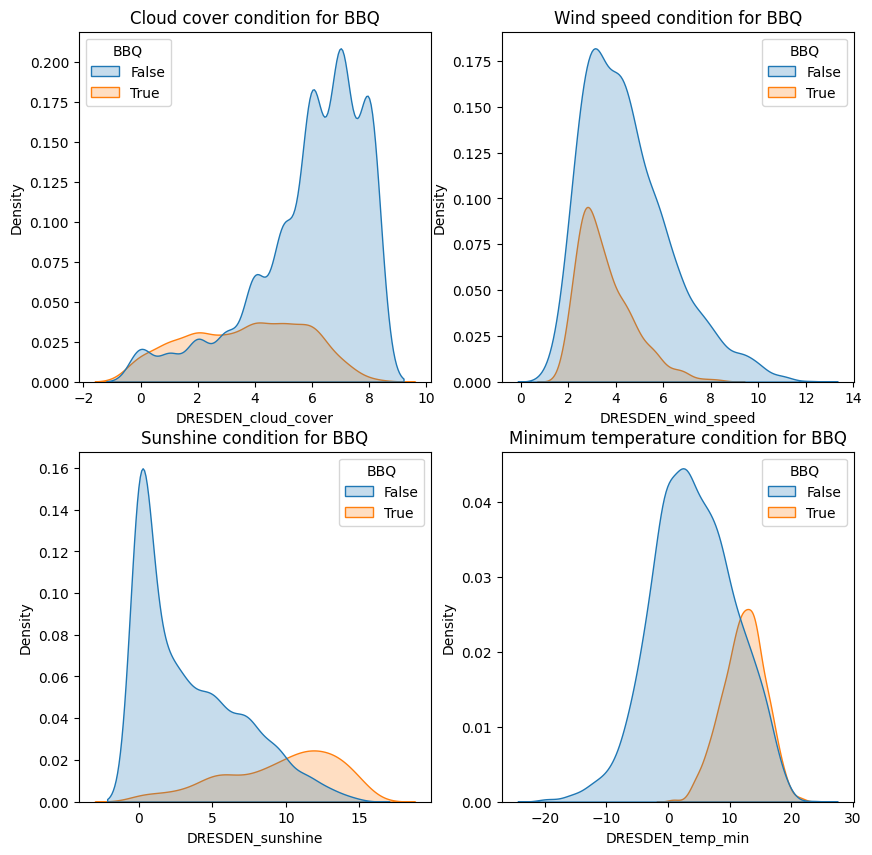

In [23]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.kdeplot(data = df_Dresden, x='DRESDEN_cloud_cover', hue = 'BBQ', fill = True, ax = axs[0,0])
axs[0,0].set_title('Cloud cover condition for BBQ')
sns.kdeplot(data = df_Dresden, x='DRESDEN_wind_speed', hue = 'BBQ', fill = True, ax = axs[0,1])
axs[0,1].set_title('Wind speed condition for BBQ')
sns.kdeplot(data = df_Dresden, x='DRESDEN_sunshine', hue = 'BBQ', fill = True, ax = axs[1,0])
axs[1,0].set_title('Sunshine condition for BBQ')
sns.kdeplot(data = df_Dresden, x='DRESDEN_temp_min', hue = 'BBQ', fill = True, ax = axs[1,1])
axs[1,1].set_title('Minimum temperature condition for BBQ')

plt.show()

C:\Users\Raj\AppData\Local\Temp\ipykernel_30412\2075764383.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df_Dresden, x='DRESDEN_precipitation', hue = 'BBQ', fill = True, ax = axs[1,0])


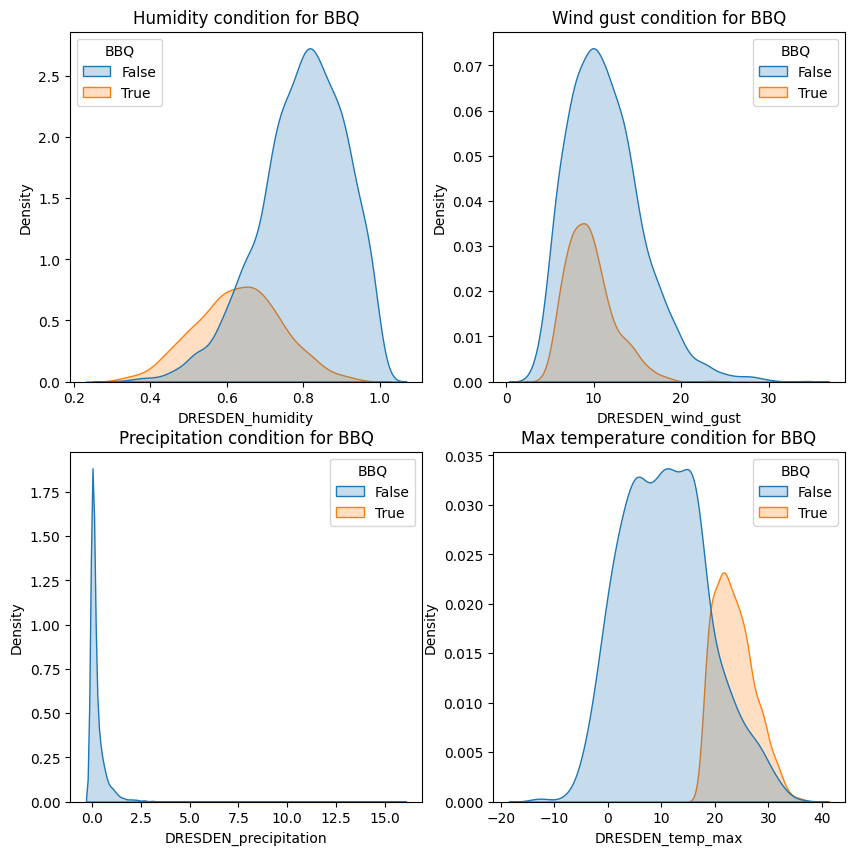

In [24]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.kdeplot(data = df_Dresden, x='DRESDEN_humidity', hue = 'BBQ', fill = True, ax = axs[0,0])
axs[0,0].set_title('Humidity condition for BBQ')

sns.kdeplot(data = df_Dresden, x='DRESDEN_wind_gust', hue = 'BBQ', fill = True, ax = axs[0,1])
axs[0,1].set_title('Wind gust condition for BBQ')

sns.kdeplot(data = df_Dresden, x='DRESDEN_precipitation', hue = 'BBQ', fill = True, ax = axs[1,0])
axs[1,0].set_title('Precipitation condition for BBQ')

sns.kdeplot(data = df_Dresden, x='DRESDEN_temp_max', hue = 'BBQ', fill = True, ax = axs[1,1])
axs[1,1].set_title('Max temperature condition for BBQ')

plt.show()

In [25]:
X = df_Dresden.drop(['DATE','BBQ'], axis = 1)
y = df_Dresden['BBQ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 28)
len(X_train), len(X_test)

(2923, 731)

# Artificial Nural Network Model

In [26]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

model = Sequential([
    Dense(X_train.shape[1], activation="relu"),
    Dense(int(X_train.shape[1] / 2), activation="relu"),
    Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(
    x=X_train,
    y=y_train,
    epochs=150,
    validation_data=(X_test, y_test),
    verbose=1 
)

(2923, 10)
(2923,)
(731, 10)
(731,)
Epoch 1/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3399 - loss: 1.0391 - val_accuracy: 0.6252 - val_loss: 0.6963
Epoch 2/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7031 - loss: 0.6750 - val_accuracy: 0.7784 - val_loss: 0.5831
Epoch 3/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7575 - loss: 0.5119 - val_accuracy: 0.8372 - val_loss: 0.3353
Epoch 4/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8610 - loss: 0.3169 - val_accuracy: 0.9015 - val_loss: 0.2406
Epoch 5/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8937 - loss: 0.2471 - val_accuracy: 0.9042 - val_loss: 0.2269
Epoch 6/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8966 - loss: 0.2274 - val_accuracy: 0.9056 - val_loss: 0.2112
Epoch 7/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8907 - loss: 0.2245 - val_accuracy: 0.9070 - val_loss: 0.2053
Epoch 8/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8947 - los

<Axes: >

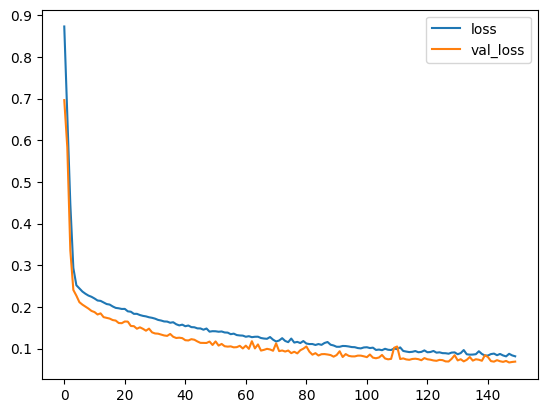

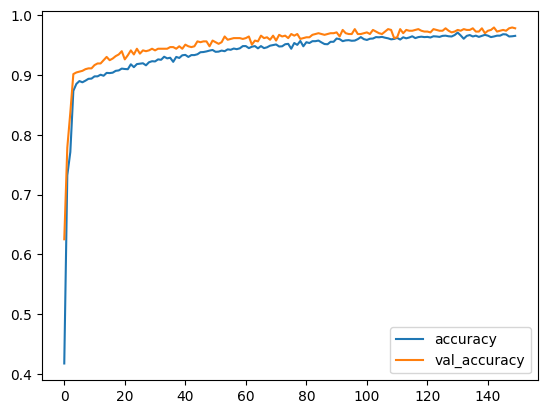

In [27]:
model_loss_acc = pd.DataFrame(model.history.history)
model_loss_acc[['loss', 'val_loss']].plot()
model_loss_acc[['accuracy', 'val_accuracy']].plot()

In [28]:
predictions = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
predictions = (predictions > 0.5).astype(int)
ann_acc = accuracy_score(y_test, predictions)
print("Accuracy:", ann_acc)

Accuracy: 0.9781121751025992


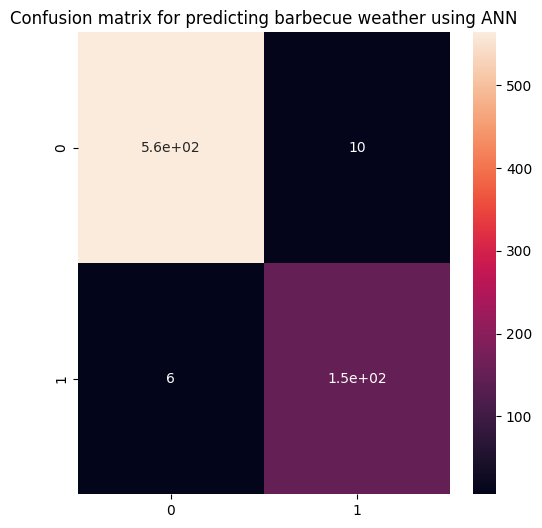

In [33]:
plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title('Confusion matrix for predicting barbecue weather using ANN');

# Convolution Nural Network - CNN Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [37]:
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, 10, 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, 10, 1))

In [38]:
model_2 = Sequential([
    Conv2D(filters=16, kernel_size=(1, 2), activation='relu', input_shape=(1, 10, 1)), 
    MaxPooling2D(pool_size=(1, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\Raj\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
model_2.fit(x=X_train_reshaped, 
            y=y_train, 
            epochs=150,
            validation_data=(X_test_reshaped, y_test), 
            verbose=1)

Epoch 1/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7875 - loss: 0.4155 - val_accuracy: 0.9083 - val_loss: 0.2316
Epoch 2/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8894 - loss: 0.2477 - val_accuracy: 0.9138 - val_loss: 0.2218
Epoch 3/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8893 - loss: 0.2411 - val_accuracy: 0.9111 - val_loss: 0.2052
Epoch 4/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8924 - loss: 0.2361 - val_accuracy: 0.9111 - val_loss: 0.1993
Epoch 5/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9032 - loss: 0.2251 - val_accuracy: 0.9193 - val_loss: 0.2014
Epoch 6/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9031 - loss: 0.2139 - val_accuracy: 0.9166 - val_loss: 0.1935
Epoch 7/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9052 - loss: 0.2168 - val_accuracy: 0.9111 - val_loss: 0.1936
Epoch 8/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8912 - loss: 0.2333 - val_accuracy: 0.9316 - v

<Axes: >

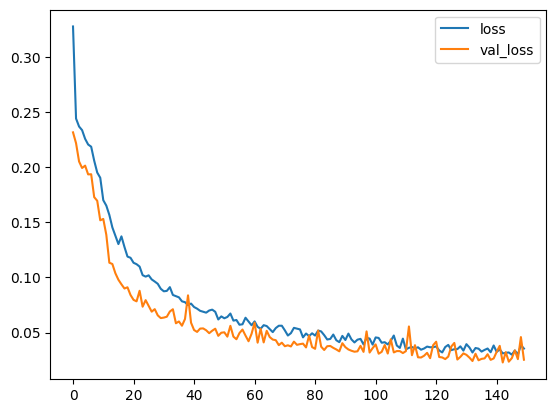

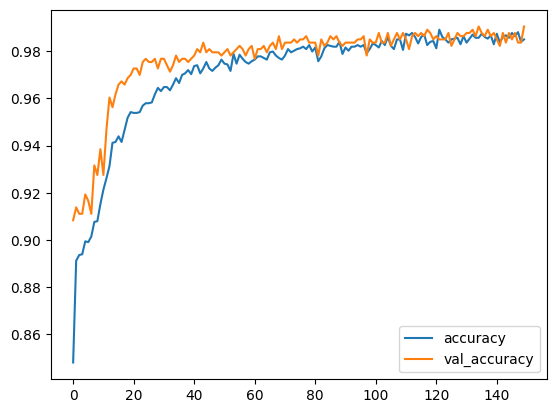

In [41]:
model2_loss_acc = pd.DataFrame(model_2.history.history)
model2_loss_acc[['loss', 'val_loss']].plot()
model2_loss_acc[['accuracy', 'val_accuracy']].plot()

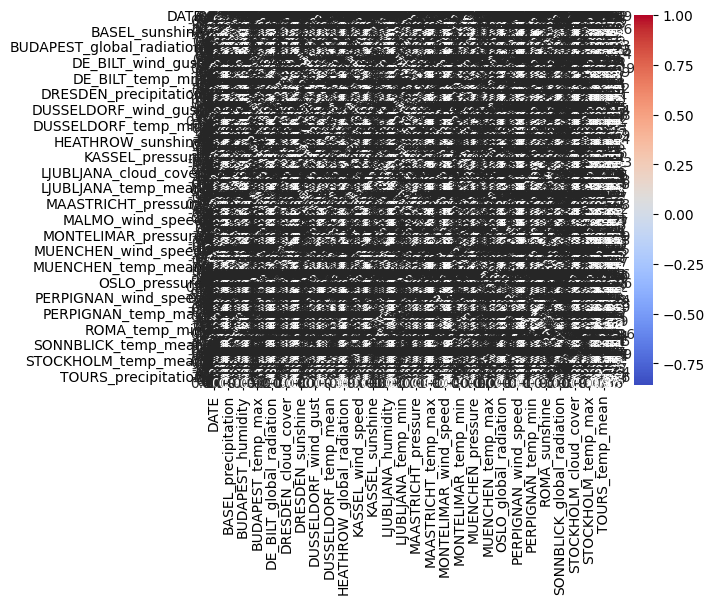

In [42]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [48]:
import joblib
joblib.dump(model, 'weather_model.pkl')


['weather_model.pkl']